# **0-1 Knapsack problem using Genetic Algorithm**

submitted by
-

Prerna Pattanaik

UCSE21061


Method-1



--- Generation 1 ---

Chromosome     Fitness   Prob      Expected Value Actual Value   
1              53        -0.0014   -0.0139        2.1978         
2              53        -0.0014   -0.0139        8.3138         
3              75        -0.0020   -0.0197        5.7150         
4              65        -0.0017   -0.0171        6.6463         
5              79        -0.0021   -0.0207        2.3166         
6              -6889     0.1808    1.8077         1.9115         
7              83        -0.0022   -0.0218        0.5352         
8              -23846    0.6257    6.2572         6.1776         
9              -7880     0.2068    2.0677         2.4429         
10             97        -0.0025   -0.0255        9.9670         

--- Generation 2 ---

Chromosome     Fitness   Prob      Expected Value Actual Value   
1              -11877    0.0832    0.8323         9.6682         
2              -7880     0.0552    0.5522         3.8783         
3              -23846    0.167

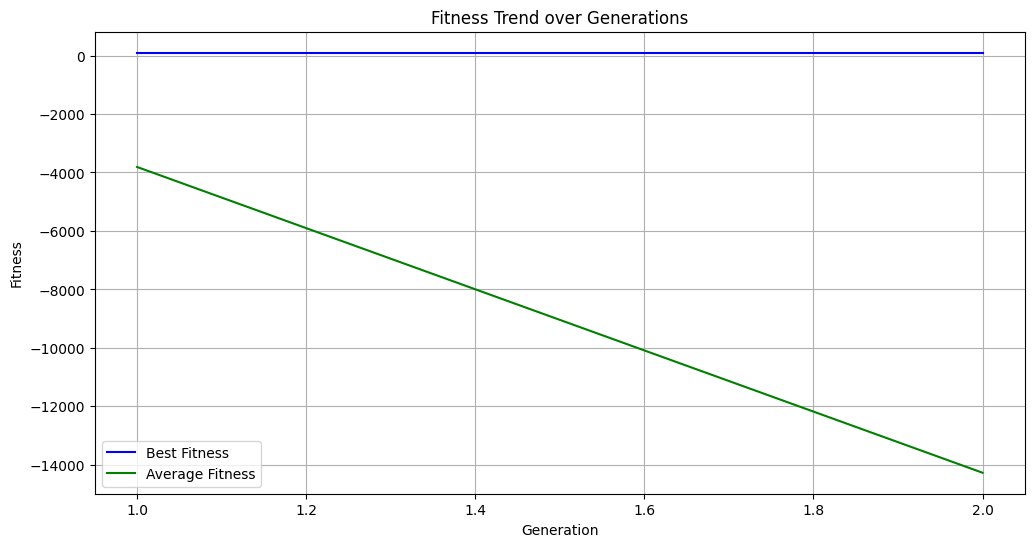


Final best solution: [1 1 0 1 0 1]
Final best profit: 97


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Parameters
weights = [11, 5, 7, 12, 21, 18]  # Weights of the items
profits = [22, 12, 18, 31, 39, 32]  # Profits associated with the items
capacity = 50  # Maximum capacity of the knapsack
penalty_factor = 1000  # Penalty factor for exceeding capacity

# Genetic Algorithm Parameters
num_items = len(weights)
population_size = 10
generations = 40
mutation_rate = 0.05
crossover_rate = 0.8

# Function to initialize the population
def create_initial_population(population_size, num_items):
    return np.random.randint(0, 2, (population_size, num_items))

# Fitness function with penalty if total weight exceeds capacity
def fitness(individual, weights, profits, capacity):
    total_weight = np.sum(individual * weights)
    total_profit = np.sum(individual * profits)
    penalty = min(0, penalty_factor * (capacity - total_weight))
    return total_profit + penalty

# Roulette Wheel Selection
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = np.sum(fitness_scores)
    probabilities = fitness_scores / total_fitness
    cumulative_probabilities = np.cumsum(probabilities)
    r = np.random.rand()
    selected_index = np.where(cumulative_probabilities >= r)[0][0]
    return population[selected_index]

# One-point Crossover
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1) - 1)
        child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
        return child1, child2, crossover_point
    else:
        return parent1.copy(), parent2.copy(), None

# Mutation (Random Mutation)
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip the bit
    return individual

# Print Generation Table
def print_generation_table(population, fitness_scores):
    print(f"\n{'Chromosome':<15}{'Fitness':<10}{'Prob':<10}{'Expected Value':<15}{'Actual Value':<15}")
    total_fitness = np.sum(fitness_scores)
    for i, (ind, fit) in enumerate(zip(population, fitness_scores)):
        prob = fit / total_fitness
        expected_value = prob * population_size
        actual_value = np.random.rand() * population_size
        print(f"{i+1:<15}{fit:<10}{prob:<10.4f}{expected_value:<15.4f}{actual_value:<15.4f}")

# Genetic Algorithm implementation
def genetic_algorithm(weights, profits, capacity, population_size, generations, mutation_rate):
    # Step 1: Create initial population
    population = create_initial_population(population_size, len(weights))

    best_solution = None
    best_fitness = float('-inf')

    # Lists to store fitness data for plotting
    best_fitnesses = []
    avg_fitnesses = []

    for generation in range(generations):
        # Step 2: Calculate fitness for each individual
        fitness_scores = np.array([fitness(ind, weights, profits, capacity) for ind in population])

        # Track the best solution found so far
        max_fitness_index = np.argmax(fitness_scores)
        if fitness_scores[max_fitness_index] > best_fitness:
            best_fitness = fitness_scores[max_fitness_index]
            best_solution = population[max_fitness_index]

        # Store fitness data
        best_fitnesses.append(best_fitness)
        avg_fitnesses.append(np.mean(fitness_scores))

        # Print generation table
        print(f"\n--- Generation {generation + 1} ---")
        print_generation_table(population, fitness_scores)

        # Step 3: Generate mating pool
        new_population = []
        while len(new_population) < population_size:
            parent1 = roulette_wheel_selection(population, fitness_scores)
            parent2 = roulette_wheel_selection(population, fitness_scores)
            child1, child2, crossover_point = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.append(child1)
            new_population.append(child2)

        population = np.array(new_population[:population_size])  # Update population for the next generation

        # Check stopping criterion
        if generation > 0 and (abs(best_fitnesses[-1] - best_fitnesses[-2]) < 0.01 or generation == generations - 1):
            print("Stopping criterion met.")
            break

    # Plotting the fitness trends
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(best_fitnesses) + 1), best_fitnesses, label='Best Fitness', color='blue')
    plt.plot(range(1, len(avg_fitnesses) + 1), avg_fitnesses, label='Average Fitness', color='green')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Trend over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_profit = genetic_algorithm(weights, profits, capacity, population_size, generations, mutation_rate)

print(f"\nFinal best solution: {best_solution}")
print(f"Final best profit: {best_profit}")


Method-2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Parameters
weights = [11, 5, 7, 12, 21, 18]  # Weights of the items
profits = [22, 12, 18, 31, 39, 32]  # Profits associated with the items
capacity = 50  # Maximum capacity of the knapsack

# Genetic Algorithm Parameters
num_items = len(weights)
population_size = 50
generations = 40
mutation_rate = 0.1
penalty_factor = 1000
delta = 1.0  # Maximum value of perturbation

# Function to initialize the population
def create_initial_population(population_size, num_items):
    return np.random.randint(0, 2, (population_size, num_items))

# Fitness function with penalty if total weight exceeds capacity
def fitness(individual, weights, profits, capacity):
    total_weight = np.sum(individual * weights)
    total_profit = np.sum(individual * profits)
    penalty = min(0, penalty_factor * (capacity - total_weight))
    return total_profit + penalty

# Selection using tournament selection
def selection(population, fitness_scores):
    tournament_size = 5
    selected_indices = np.random.randint(0, len(population), tournament_size)
    best_individual_index = np.argmax(fitness_scores[selected_indices])
    return population[selected_indices[best_individual_index]]

# Crossover (Single Point Crossover)
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
    return child1, child2

# Mutation (Random Mutation)
def mutate(individual, mutation_rate, delta):
    if np.random.rand() < mutation_rate:
        mutation_point = np.random.randint(0, len(individual))
        r = np.random.rand()  # Random number between 0.0 and 1.0
        perturbation = (r - 0.5) * delta
        individual[mutation_point] = int(np.clip(individual[mutation_point] + perturbation, 0, 1))  # Ensure value is in {0, 1}
    return individual

# Genetic Algorithm implementation
def genetic_algorithm(weights, profits, capacity, population_size, generations, mutation_rate, delta):
    # Step 1: Create initial population
    population = create_initial_population(population_size, len(weights))

    best_solution = None
    best_fitness = float('-inf')

    # Lists to store fitness data for plotting
    best_fitnesses = []
    avg_fitnesses = []

    for generation in range(generations):
        # Step 2: Calculate fitness for each individual
        fitness_scores = np.array([fitness(ind, weights, profits, capacity) for ind in population])

        # Track the best solution found so far
        max_fitness_index = np.argmax(fitness_scores)
        if fitness_scores[max_fitness_index] > best_fitness:
            best_fitness = fitness_scores[max_fitness_index]
            best_solution = population[max_fitness_index]

        # Store fitness data
        best_fitnesses.append(best_fitness)
        avg_fitnesses.append(np.mean(fitness_scores))

        # iteration details
        print(f"\n--- Generation {generation + 1} ---")
        print(f"Best solution so far: {best_solution}")
        print(f"Best fitness so far: {best_fitness}")
        print(f"Average fitness of the population: {np.mean(fitness_scores)}")

        # Step 3: Generate next generation
        new_population = []

        # Elitism: Carry forward the best individual
        new_population.append(best_solution)

        while len(new_population) < population_size:
            # Step 4: Selection
            parent1 = selection(population, fitness_scores)
            parent2 = selection(population, fitness_scores)

            # Step 5: Crossover
            child1, child2 = crossover(parent1, parent2)

            # Step 6: Mutation
            child1 = mutate(child1, mutation_rate, delta)
            child2 = mutate(child2, mutation_rate, delta)

            new_population.append(child1)
            new_population.append(child2)

        population = np.array(new_population[:population_size])  # Update population for the next generation

    # Plotting the fitness trends


    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_profit = genetic_algorithm(weights, profits, capacity, population_size, generations, mutation_rate, delta)

print(f"\nFinal best solution: {best_solution}")
print(f"Final best profit: {best_profit}")



--- Generation 1 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: -790.5

--- Generation 2 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: -1196.0

--- Generation 3 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: -947.48

--- Generation 4 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: -720.98

--- Generation 5 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: -261.42

--- Generation 6 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: 102.08

--- Generation 7 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: 101.58

--- Generation 8 ---
Best solution so far: [1 0 1 1 0 1]
Best fitness so far: 103
Average fitness of the population: 102